In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import lines
import seaborn as sns
import numpy as np

# Set default font family and dpi
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['figure.dpi'] = 150

In [2]:
# Load data from CSV file
df = pd.read_csv('data1.csv', index_col=0, header=[0,1])
df.index.name = 'bin'
df

Adjectives             Adverbs             Nouns         Verbs        \
bin           w–g   w–w   g–g     w–g   w–w   g–g   w–g w–w g–g   w–g   w–w   
bin                                                                           
all          81.0  61.0  63.0    76.0  63.0  56.0    84  57  74  94.0  68.0   
1–10         54.0  54.0  56.0    72.0  56.0  51.0    56  59  57  94.0  55.0   
11–20        68.0  56.0  65.0    68.0  53.0  42.0    60  53  58  94.0  55.0   
21–40        89.0  67.0  54.0    83.0  66.0  71.0    76  53  70  93.0  55.0   
41–80         NaN   NaN   NaN     NaN   NaN   NaN    80  56  69  74.0  64.0   
81–160        NaN   NaN   NaN     NaN   NaN   NaN    90  50  81   NaN   NaN   

              
bin      g–g  
bin           
all     65.0  
1–10    57.0  
11–20   57.0  
21–40   59.0  
41–80   59.0  
81–160   NaN

In [3]:
df2 = pd.read_csv('data2.csv', index_col=[0,1], header=[0,1])
df2.index.names = ['Model', 'Tokens']
df2

GPT-2                      WebText                      Total  \
              Words Ranks $\alpha,\beta$   Words Ranks $\alpha,\beta$ Words   
Model  Tokens                                                                 
Small  1000    0.44  0.64           0.62    0.68  0.58           0.76  0.56   
       10000   0.89  0.92           0.99    0.96  0.97           1.00  0.93   
Medium 1000    0.57  0.43           0.72    0.48  0.60           0.64  0.53   
       10000   0.77  0.74           0.94    0.76  0.77           1.00  0.77   

                                    
              Ranks $\alpha,\beta$  
Model  Tokens                       
Small  1000    0.61           0.69  
       10000   0.95           1.00  
Medium 1000    0.52           0.68  
       10000   0.76            NaN

<AxesSubplot:xlabel='None-bin', ylabel='bin'>

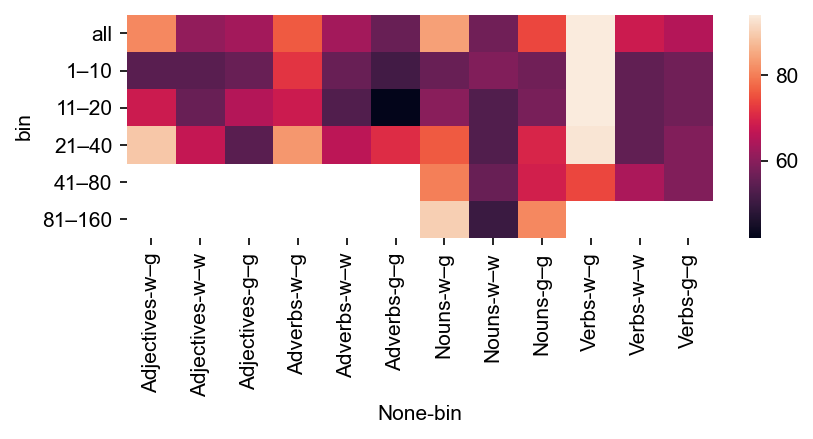

In [4]:
plt.figure(figsize=(16/2.54, 5/2.54))
sns.heatmap(df)

# Updated version 

In [5]:
def annotate_nans(df, label='NA', ax=None, grid=True, **kwargs):
    """Annotate missing values in the heatmap"""
    if ax is None: ax = plt.gca()
    props = dict(va='center', ha='center', fontsize=6, color='0.7')
    props.update(**kwargs)
    na_positions = zip(*np.where(df.isnull()))
    for y, x in na_positions:
        ax.annotate(label, xy=(x+.5, y+.5), **props)
        
    if grid:
        for y in range(len(df)):
            plt.axhline(y, color='0.9', lw=.5, zorder=-1)

(0.0, 12.0, 6.0, 0.0)

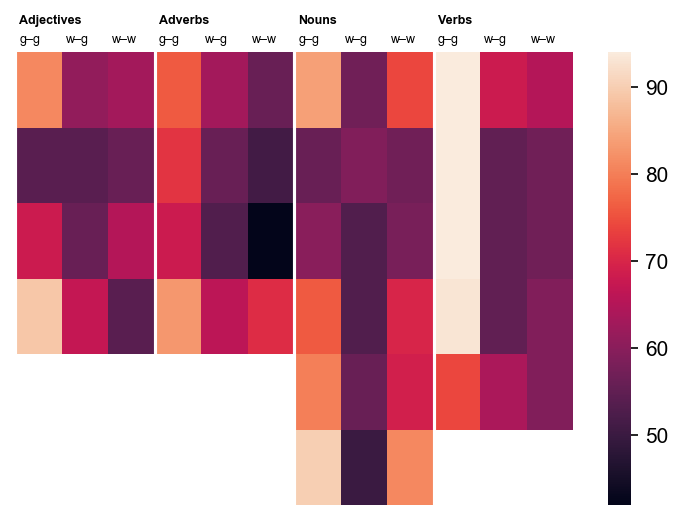

In [6]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def annotate_multi_index_columns(df, ax=None, fontsize=6, h=None, number=False):
    """Show a multilevel index above the columns"""
    if ax is None: ax = plt.gca()
    if h is None: h = fontsize
    
    levels0 = df.columns.levels[0]
    levels1 = df.columns.levels[1]
    
    for i, label0 in enumerate(levels0):
        x0 = len(levels1) * i
        plt.axvline(x0, color='w')
        if number: label0 = f'{alphabet[i]}. {label0}'
        plt.annotate(label0, xy=(x0, 0), 
                     xytext=(2, 2*h), textcoords='offset points', 
                     va='bottom', fontweight='bold',
                     fontsize=fontsize)

        for j, label1 in enumerate(levels1):
            plt.annotate(label1, xy=(x0 + j, 0), 
                     xytext=(2, h), textcoords='offset points', 
                     va='center', ha='left',
                     fontsize=fontsize)
            
annotate_multi_index_columns(df)
sns.heatmap(df)
plt.axis('off')  

In [7]:
def annotate_multi_index_columns(df, ax=None, fontsize=6, h=None, repeat_header=False):
    """Show a multilevel index above the columns"""
    if ax is None: ax = plt.gca()
    if h is None: h = 1.25 * fontsize
    
    prev_header = None
    for col, header in enumerate(df.columns):
        for level, text in enumerate(header):
            if col == 0 or repeat_header or text != prev_header[level]:
                y = df.columns.nlevels - level 
                plt.annotate(text, xy=(col, 0), 
                         xytext=(1, y*h), 
                         textcoords='offset points', 
                         va='center',
                         fontweight='bold' if level == 0 else 'normal',
                         fontsize=fontsize)
                
                if col > 0 and level == 0:
                    plt.axvline(col, color='w')
                
        prev_header = header
            
# annotate_multi_index_columns(df2)
# sns.heatmap(df2)
# plt.axis('off')  

In [8]:
def annotate_multi_index(df, ax=None, fontsize=7, h=None, char_width=1/45, 
                         pad=1, line_kws=dict(), line_end=None, repeat_header=False,
                         gridlines=True,):
    """Annotate the row index"""
    if ax is None: ax = plt.gca()
    if h is None: h = 1.25 * fontsize
    
    # Formatting of the gridlines
    line_props = dict(lw=0.5, color='0.7', zorder=-1)
    line_props.update(line_kws)
    if line_end is None: line_end = df.shape[1]

    # Determine the positions of the columns
    max_char_len = lambda index: max(len(str(s)) for s in index)
    col_widths = np.array([max_char_len(head) for head in df.index.levels]) + pad
    positions = char_width * fontsize * np.cumsum(-np.array(col_widths)[::-1])[::-1]
    nlevels = df.index.nlevels
    
    prev_header = None
    all_lines = []
    for row, header in enumerate(df.index):
        line_drawn = False
        for level, text in enumerate(header):
            if row == 0 or repeat_header or text != prev_header[level]:
                plt.annotate(text, 
                             xy=(positions[level], row + .5), 
                             annotation_clip=False,
                             va='center', ha='left',
                             fontweight='bold' if level == 0 else 'normal',
                             fontsize=fontsize)
                
                if line_drawn is False:
                    line = lines.Line2D([positions[level], line_end], [row, row], **line_props)
                    all_lines.append(line)

        prev_header = header
    
    # Final bottom line
    line = lines.Line2D([positions[0], line_end], [len(df.index), len(df.index)], **line_props)
    all_lines.append(line)
    
    for line in all_lines:
        line.set_clip_on(False)
        if gridlines: ax.add_line(line)
        
    for level, name in enumerate(df.index.names):
        plt.annotate(name, 
                     xy=(positions[level], 0), 
                     xytext=(0, h), 
                     textcoords='offset points', 
                     annotation_clip=False,
                     va='center', ha='left', 
                     fontstyle='italic', fontsize=fontsize)

    
# annotate_multi_index(df2)
# sns.heatmap(df2)
# plt.axis('off')

In [9]:
def annotate_index(df, ax=None, fontsize=7, h=None, **kwargs):
    """Annotate the row index"""
    if ax is None: ax = plt.gca()
    if h is None: h = fontsize
        
    max_len = df.index.map(len).max()
    label_x = -4.5 * max_len
    for i, label in enumerate(df.index):
        plt.annotate(label, xy=(0, i + .5), 
                     xytext=(label_x, 0), textcoords='offset points', 
                     va='center', ha='left',
                     fontsize=fontsize)

    plt.annotate(df.index.name, xy=(0, 0), 
                         xytext=(label_x, h), textcoords='offset points', 
                         va='center', ha='left', fontstyle='italic',
                         fontsize=fontsize)
# annotate_index(df)
# sns.heatmap(df)
# plt.axis('off')

In [10]:
def show_table(df, figsize=(14/2.54, 6/2.54), fontsize=7, cmap='magma', **kwargs):
    props = dict(annot=True, annot_kws=dict(fontsize=fontsize), 
                 cbar_kws=dict(fraction=.05))
    props.update(kwargs)
    
    fig, ax = plt.subplots(figsize=figsize, dpi=150, tight_layout=True)
    ax.axis('off')
    sns.heatmap(df, cmap=cmap, ax=ax, **props)
    annotate_multi_index_columns(df, fontsize=fontsize)
    
    # Todo fix this
    if df.index.nlevels > 1:
        annotate_multi_index(df, fontsize=fontsize)
    else:
        annotate_index(df, fontsize=fontsize)
    
    annotate_nans(df, fontsize=fontsize)
    
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=fontsize)
    
# show_table(df)

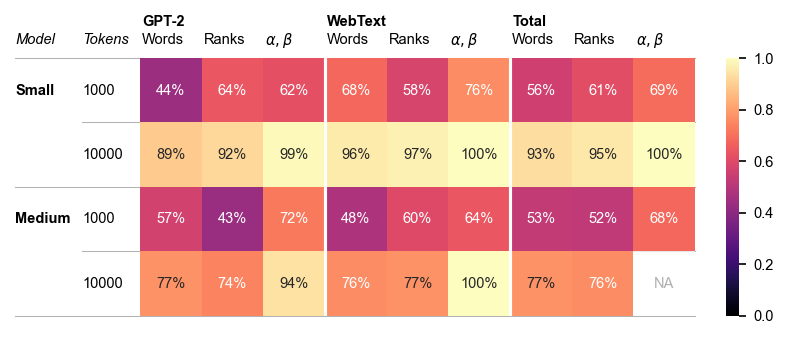

In [11]:
show_table(df2, vmin=0, vmax=1, fmt='.0%')
plt.savefig('example2.pdf')

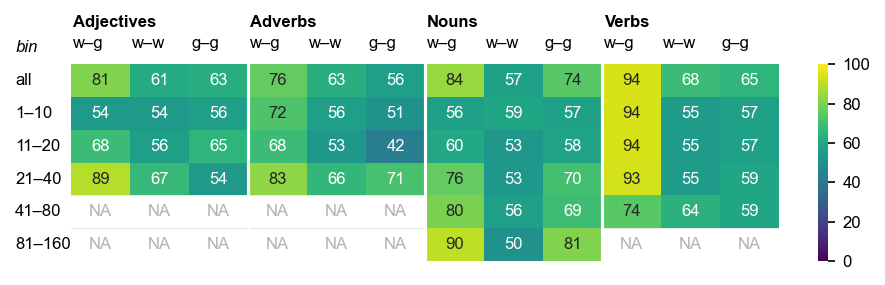

In [12]:
show_table(df, , fontsize=8, cmap='viridis', vmin=0, vmax=100)
plt.savefig